# Importing the Libarires

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline as line
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

# Import the Dataset

In [12]:
cd Downloads/

C:\Users\HiFi\Downloads


In [13]:
Bank=pd.read_excel(r'CHURNDATA (1).xlsx')
Bank

,CIF,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,XXXXXX,Feb 13 1970 12:00AM,49,7116.64,MALE,MARRIED,1994-06-30,25,277,265,...,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,XXXXXX,Sep 20 1973 12:00AM,46,1500000.00,FEMALE,SINGLE,2005-05-19,14,37,15,...,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,XXXXXX,Jul 18 1966 12:00AM,53,5000000.00,FEMALE,SINGLE,2005-05-20,14,31,14,...,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,XXXXXX,Jan 9 2004 12:00AM,15,500.00,FEMALE,SINGLE,2005-05-20,14,0,1,...,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,XXXXXX,Mar 7 1971 12:00AM,48,9000000.00,FEMALE,SINGLE,2014-06-30,5,15,33,...,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,XXXXXX,Sep 10 1951 12:00AM,68,4500.00,MALE,SINGLE,2005-07-25,14,13,12,...,0.00,0.00,5645.60,26,0.00,0,26,2223,LOW,CHURN
1245,XXXXXX,Mar 23 1984 12:00AM,35,3500000.00,MALE,SINGLE,2005-07-27,14,55,35,...,119137.62,440891.65,385735.90,127,674630.41,22,149,2222,MIDLE,ACTIVE
1246,XXXXXX,Feb 4 1985 12:00AM,34,1000.00,MALE,SINGLE,2005-07-25,14,415,368,...,733658.65,971555.27,2473621.68,1207,2641348.01,217,1424,2232,MIDLE,ACTIVE
1247,XXXXXX,Feb 3 1950 12:00AM,69,2000000.00,MALE,SINGLE,2005-07-26,14,147,202,...,532708.75,400814.60,1371852.22,583,1310768.35,48,631,2222,MIDLE,ACTIVE


In [14]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   CIF                                 1249 non-null   object        
 1   CUS_DOB                             1249 non-null   object        
 2   AGE                                 1249 non-null   int64         
 3   CUS_Month_Income                    1238 non-null   float64       
 4   CUS_Gender                          1247 non-null   object        
 5   CUS_Marital_Status                  1249 non-null   object        
 6   CUS_Customer_Since                  1249 non-null   datetime64[ns]
 7   YEARS_WITH_US                       1249 non-null   int64         
 8   # total debit transactions for S1   1249 non-null   int64         
 9   # total debit transactions for S2   1249 non-null   int64         
 10  # total debit transactio

# Data Cleaning

In [15]:
del Bank['CIF']

In [16]:
del Bank['CUS_DOB']

In [17]:
del Bank['CUS_Customer_Since']

In [18]:
Bank.isnull().sum()


AGE                                    0
CUS_Month_Income                      11
CUS_Gender                             2
CUS_Marital_Status                     0
YEARS_WITH_US                          0
# total debit transactions for S1      0
# total debit transactions for S2      0
# total debit transactions for S3      0
total debit amount for S1              0
total debit amount for S2              0
total debit amount for S3              0
# total credit transactions for S1     0
# total credit transactions for S2     0
# total credit transactions for S3     0
total credit amount for S1             0
total credit amount for S2             0
total credit amount for S3             0
total debit amount                     0
total debit transactions               0
total credit amount                    0
total credit transactions              0
total transactions                     0
CUS_Target                             0
TAR_Desc                               0
Status          

In [19]:
Bank['CUS_Gender'].value_counts()

MALE      741
FEMALE    506
Name: CUS_Gender, dtype: int64

In [20]:
Bank[Bank['CUS_Month_Income'].isnull()]

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
85,62,NaN,FEMALE,SINGLE,23,21,17,9,41893.60,29400.00,...,0.00,0.00,82043.30,47,0.00,0,47,2223,LOW,ACTIVE
99,66,NaN,FEMALE,MARRIED,21,11,25,22,28500.00,42200.00,...,24294.55,26893.50,101900.00,58,75482.60,32,90,2223,LOW,ACTIVE
184,119,NaN,NaN,MARRIED,21,4,4,1,2899.60,15000.00,...,2000.00,0.00,18649.30,9,2000.00,1,10,2223,LOW,CHURN
316,44,NaN,MALE,SINGLE,14,0,2,0,0.00,1000.00,...,0.00,0.00,1000.00,2,0.00,0,2,2222,MIDLE,CHURN
368,43,NaN,MALE,SINGLE,14,22,56,23,63671.14,124289.00,...,125400.78,41800.26,229406.14,101,250801.56,12,113,2222,MIDLE,ACTIVE
400,56,NaN,MALE,SINGLE,24,26,20,0,255579.65,42107.89,...,0.00,0.00,297687.54,46,0.00,0,46,2222,MIDLE,CHURN
427,56,NaN,MALE,SINGLE,28,9,14,2,6545.00,19800.00,...,18550.72,0.00,26745.00,25,18550.72,1,26,2223,LOW,ACTIVE
857,58,NaN,FEMALE,SINGLE,22,37,68,47,60103.25,134153.50,...,80679.78,180922.70,276279.95,152,261602.48,8,160,2223,LOW,ACTIVE
938,43,NaN,FEMALE,MARRIED,23,6,6,9,2882.52,2478.60,...,0.00,2900.00,9751.20,21,2900.00,1,22,2222,MIDLE,ACTIVE
996,119,NaN,NaN,SINGLE,21,27,0,0,43318.00,0.00,...,0.00,0.00,43318.00,27,39250.86,5,32,2233,LOW,CHURN


In [21]:
data=Bank.copy()
data.head(5)

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,49,7116.64,MALE,MARRIED,25,277,265,345,1459126.64,1230543.08,...,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,46,1500000.00,FEMALE,SINGLE,14,37,15,45,35372.55,20134.00,...,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,53,5000000.00,FEMALE,SINGLE,14,31,14,8,28248.85,4777.66,...,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,15,500.00,FEMALE,SINGLE,14,0,1,0,0.00,4000.00,...,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,48,9000000.00,FEMALE,SINGLE,5,15,33,12,69083.38,223007.51,...,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE


In [22]:
data['CUS_Gender'].fillna('MALE',inplace=True)

In [23]:
data['CUS_Month_Income'].fillna(data['CUS_Month_Income'].mean(),inplace=True)

In [24]:
data.isnull().sum()

AGE                                   0
CUS_Month_Income                      0
CUS_Gender                            0
CUS_Marital_Status                    0
YEARS_WITH_US                         0
# total debit transactions for S1     0
# total debit transactions for S2     0
# total debit transactions for S3     0
total debit amount for S1             0
total debit amount for S2             0
total debit amount for S3             0
# total credit transactions for S1    0
# total credit transactions for S2    0
# total credit transactions for S3    0
total credit amount for S1            0
total credit amount for S2            0
total credit amount for S3            0
total debit amount                    0
total debit transactions              0
total credit amount                   0
total credit transactions             0
total transactions                    0
CUS_Target                            0
TAR_Desc                              0
Status                                0


# Data Visualization

In [25]:
status_value=data['Status'].value_counts().values

In [26]:
status_index=data['Status'].value_counts().index

([<matplotlib.patches.Wedge at 0x23539ed0f40>,
 [Text(-0.9255148230770242, 0.5944933239866574, 'ACTIVE'),
  Text(0.925514795246782, -0.5944933673131327, 'CHURN')],
 [Text(-0.5048262671329222, 0.324269085810904, '81.83%'),
  Text(0.5048262519527902, -0.3242691094435269, '18.17%')])

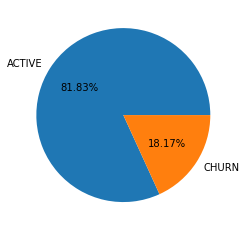

In [27]:
plt.pie(status_value,labels=status_index,autopct='%1.2f%%')

C:\Users\HiFi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE', ylabel='Density'>

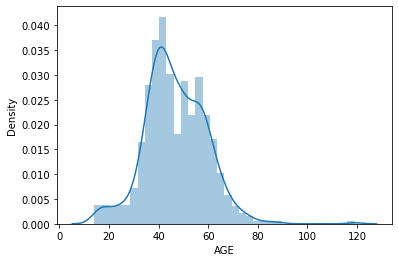

In [28]:
sns.distplot(data['AGE'])

<AxesSubplot:xlabel='CUS_Gender', ylabel='count'>

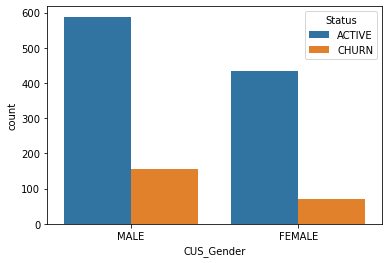

In [29]:
sns.countplot(data=data,hue='Status',x='CUS_Gender')

<AxesSubplot:xlabel='CUS_Marital_Status', ylabel='count'>

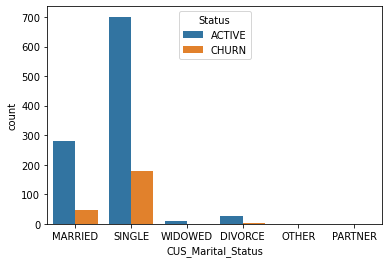

In [30]:
sns.countplot(data=data,x='CUS_Marital_Status',hue='Status')

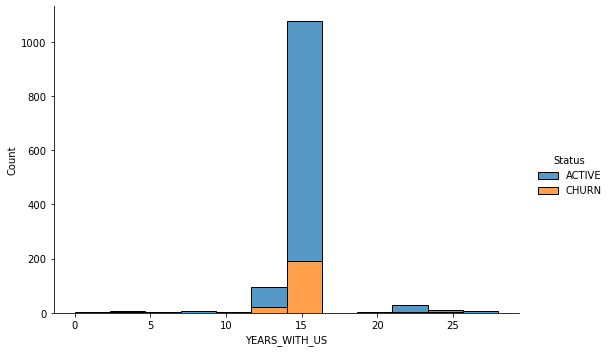

In [31]:
sns.displot(data=data,x='YEARS_WITH_US',aspect=1.5,hue='Status',multiple='stack')

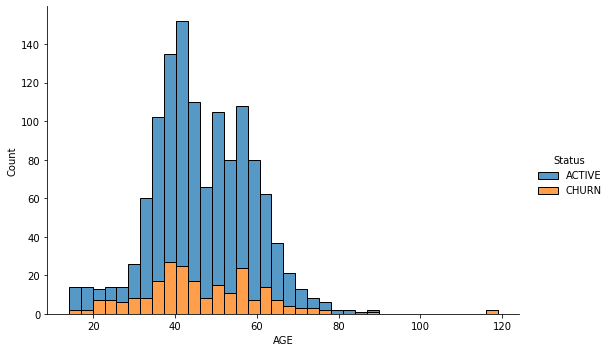

In [32]:
sns.displot(data=data,x='AGE',aspect=1.5,hue='Status',multiple='stack')

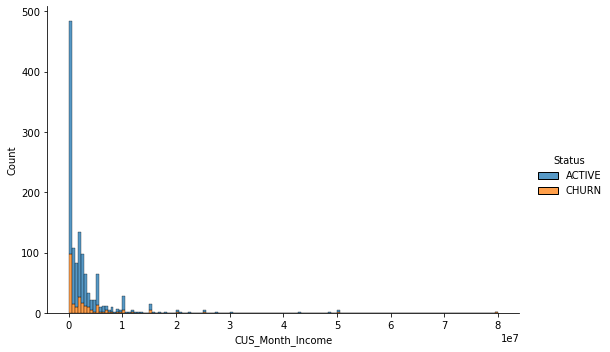

In [33]:
sns.displot(data=data,x='CUS_Month_Income',aspect=1.5,hue='Status',multiple='stack')

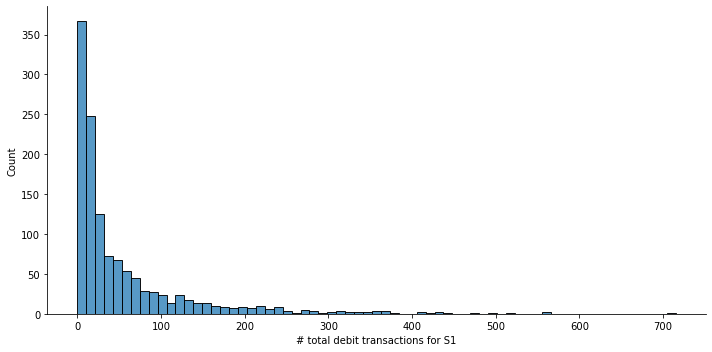

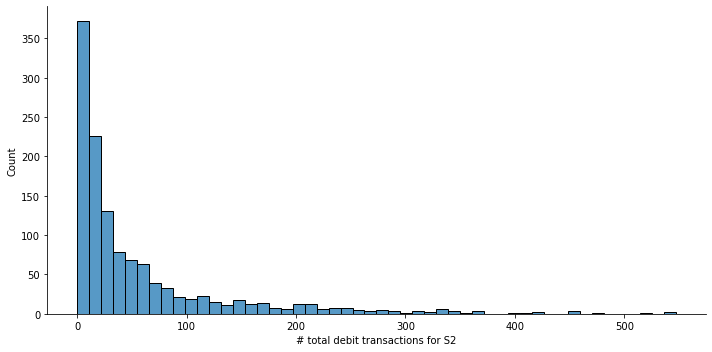

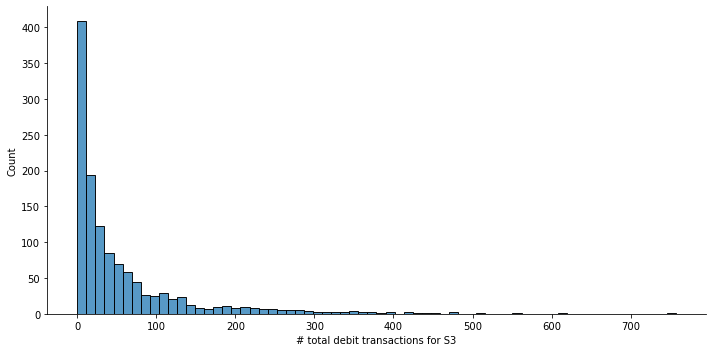

In [34]:

sns.displot(data=data,x='# total debit transactions for S1',aspect=2.0)
sns.displot(data=data,x='# total debit transactions for S2',aspect=2.0)
sns.displot(data=data,x='# total debit transactions for S3',aspect=2.0)


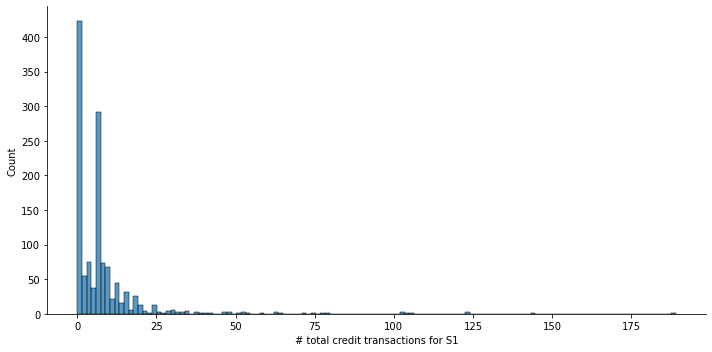

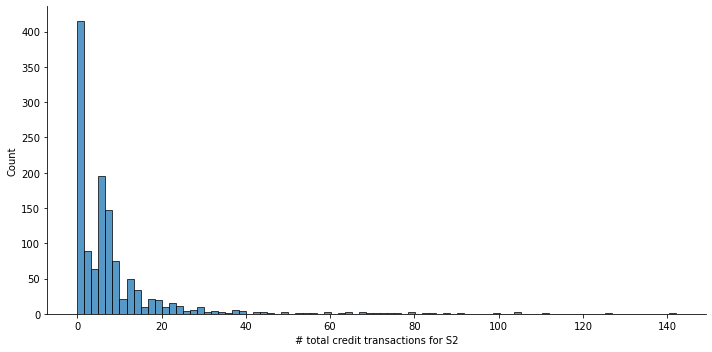

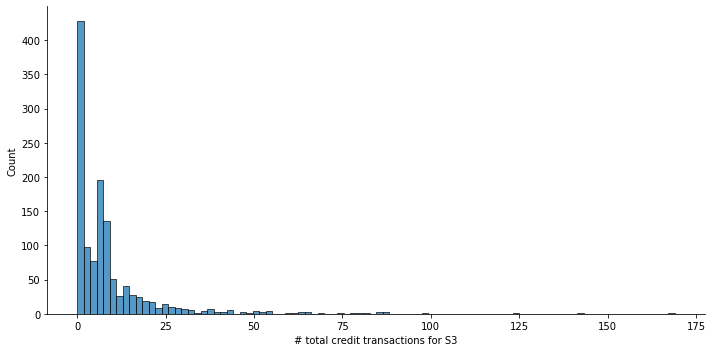

In [35]:

sns.displot(data=data,x='# total credit transactions for S1',aspect=2.0)
sns.displot(data=data,x='# total credit transactions for S2',aspect=2.0)
sns.displot(data=data,x='# total credit transactions for S3',aspect=2.0)

<AxesSubplot:xlabel='CUS_Target', ylabel='count'>

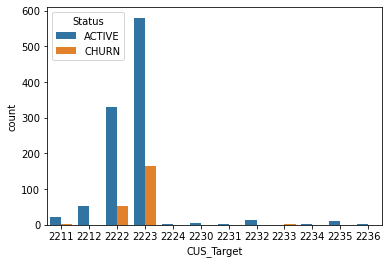

In [36]:
sns.countplot(data=data,hue='Status',x='CUS_Target')

<AxesSubplot:xlabel='TAR_Desc', ylabel='count'>

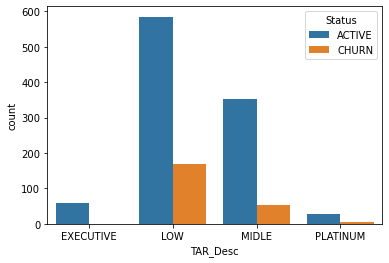

In [37]:
sns.countplot(hue='Status',data=data,x='TAR_Desc')

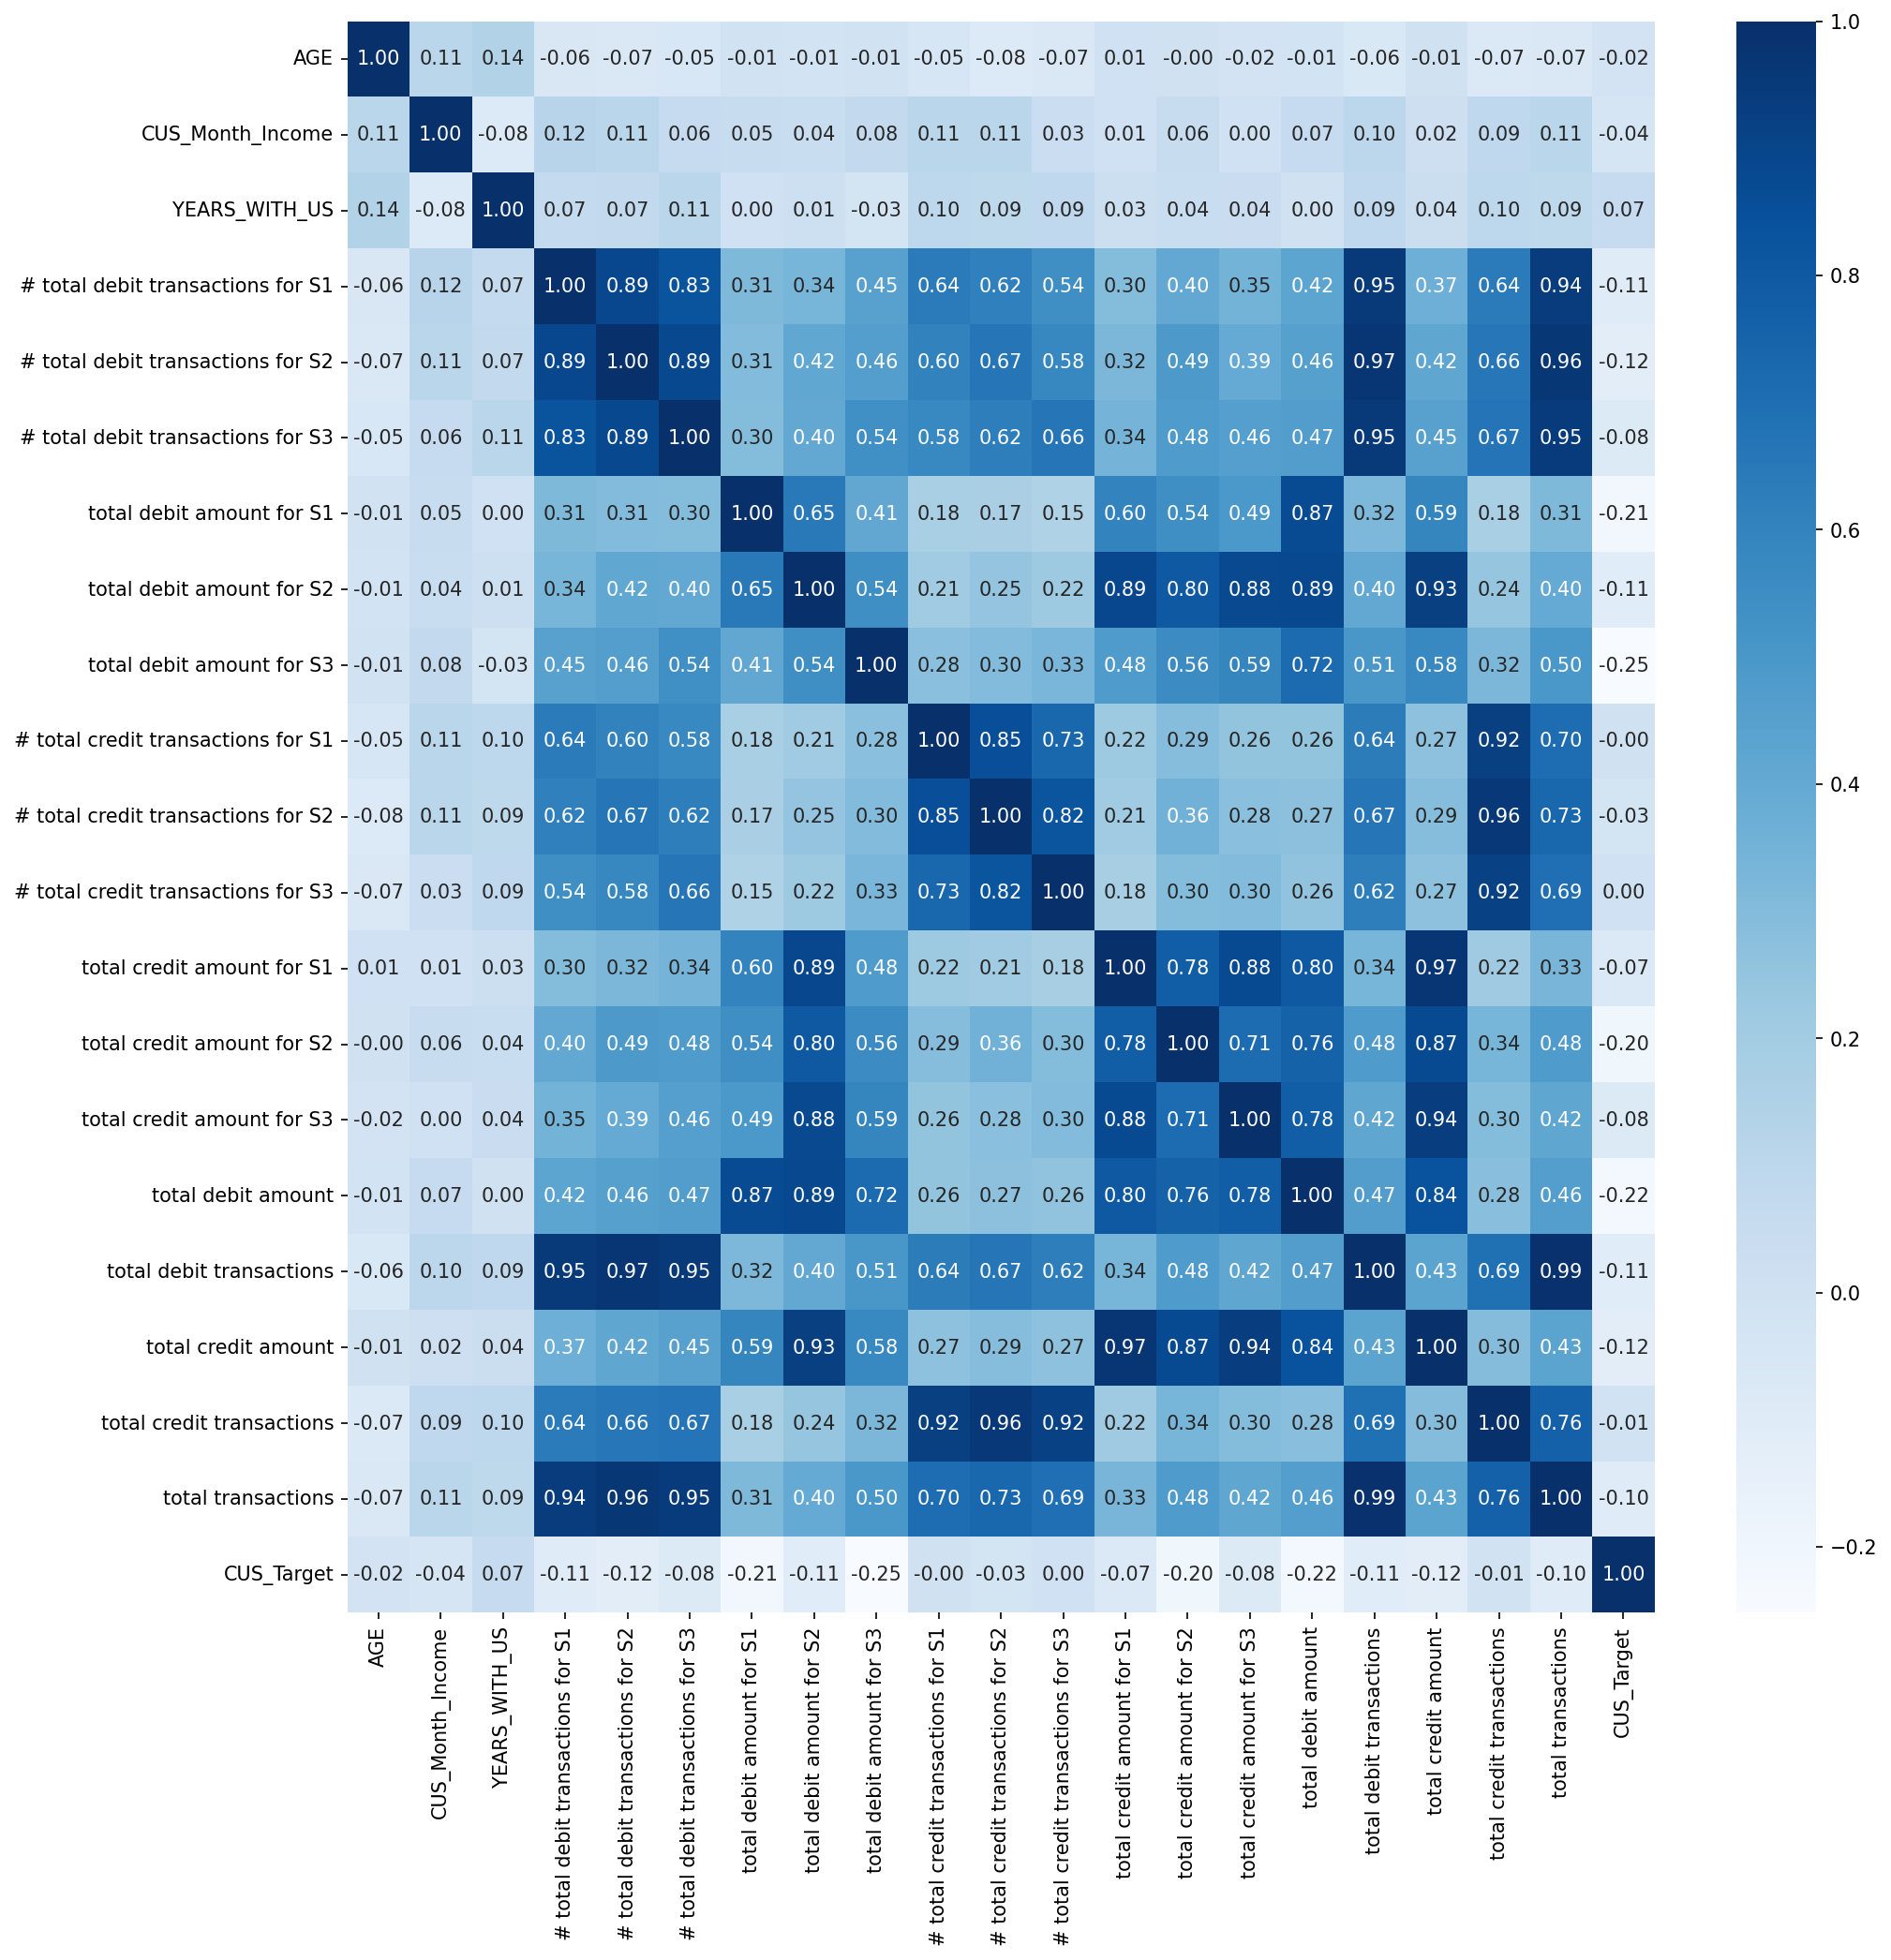

In [38]:
plt.figure(figsize=(15,15), dpi=150)
sns.heatmap(data.corr(), annot=True, fmt=".2f",cmap="Blues")
plt.show()


C:\Users\HiFi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


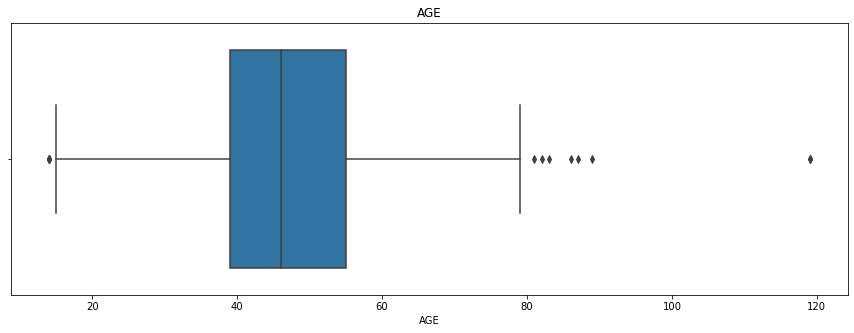

C:\Users\HiFi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


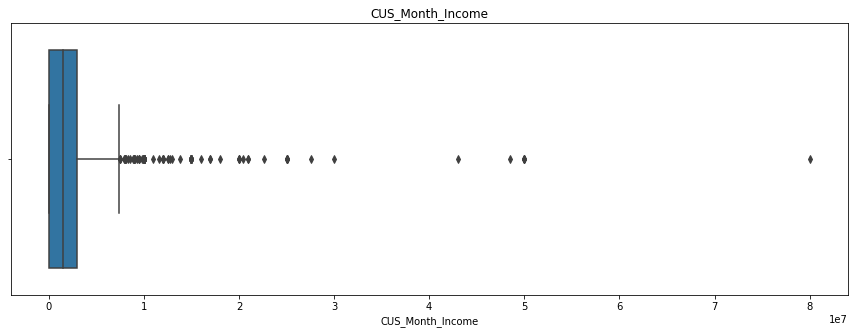

C:\Users\HiFi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


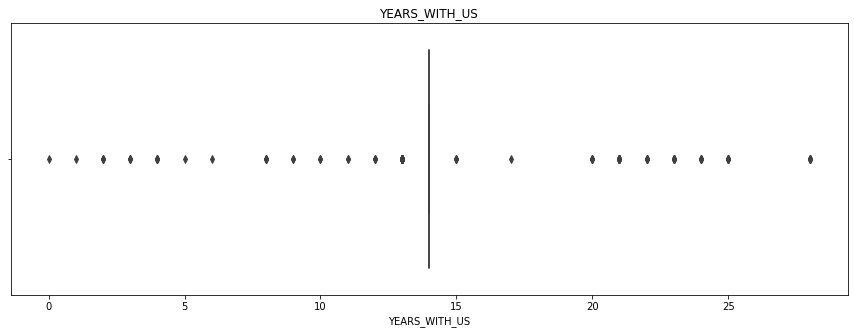

C:\Users\HiFi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


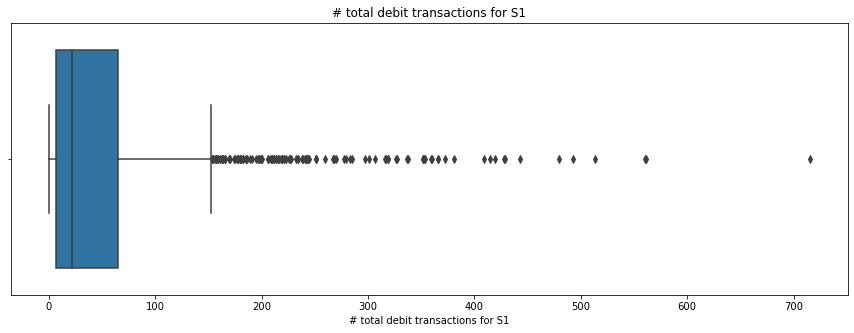

C:\Users\HiFi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


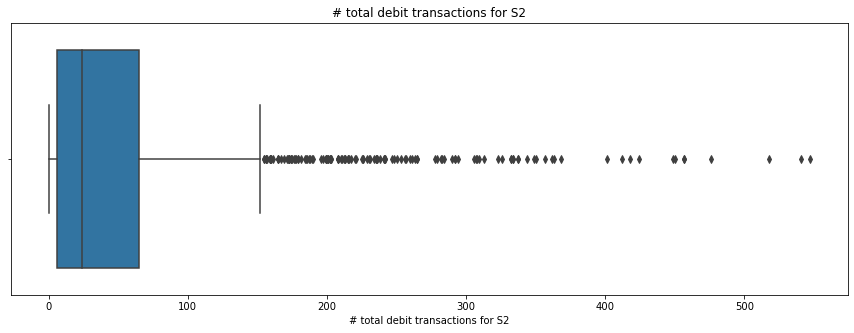

C:\Users\HiFi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


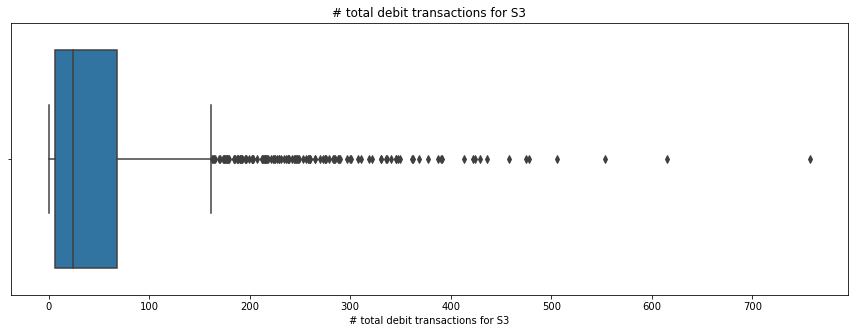

C:\Users\HiFi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


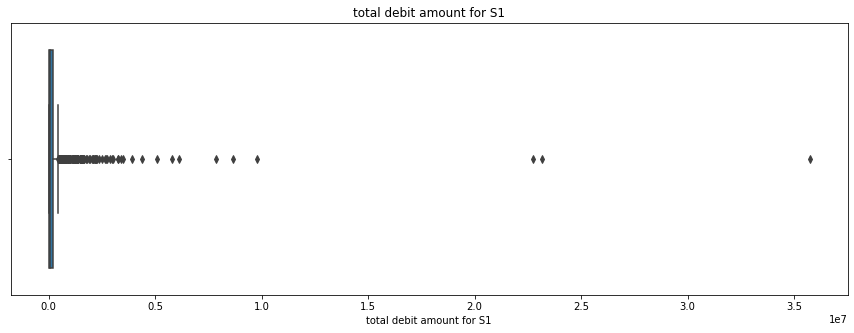

C:\Users\HiFi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


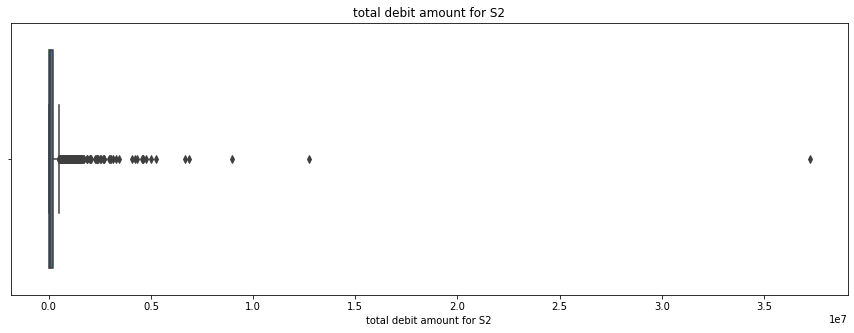

C:\Users\HiFi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


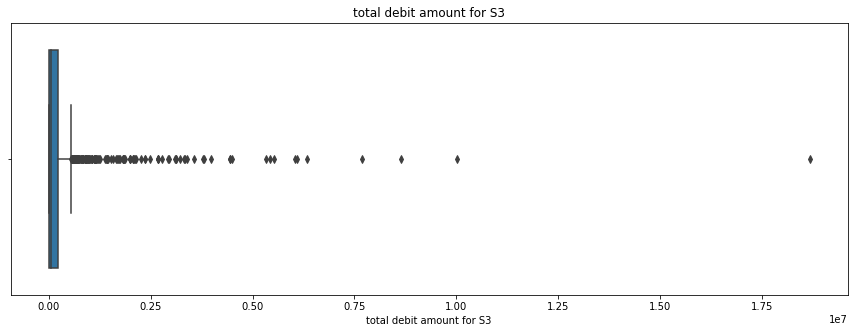

C:\Users\HiFi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


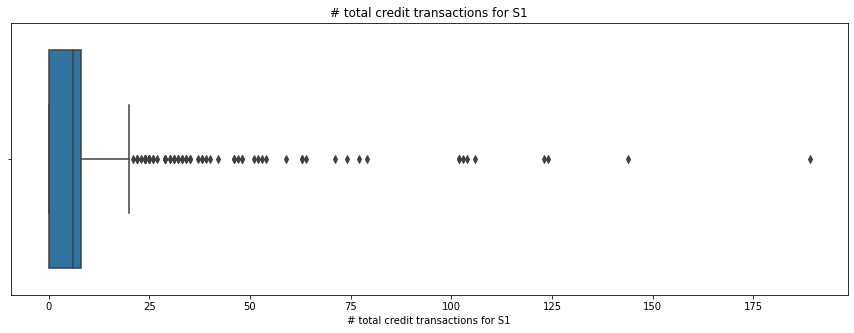

C:\Users\HiFi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


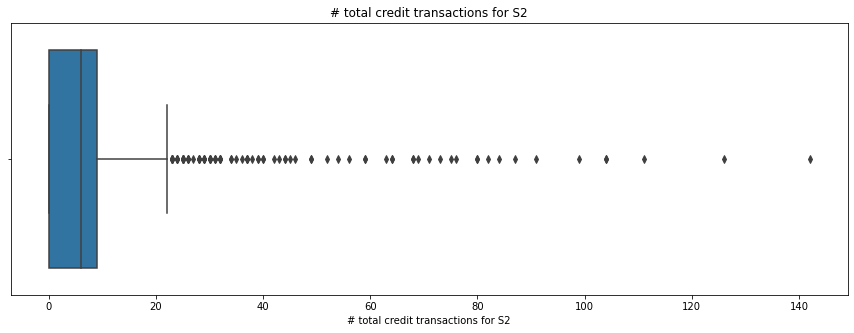

C:\Users\HiFi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


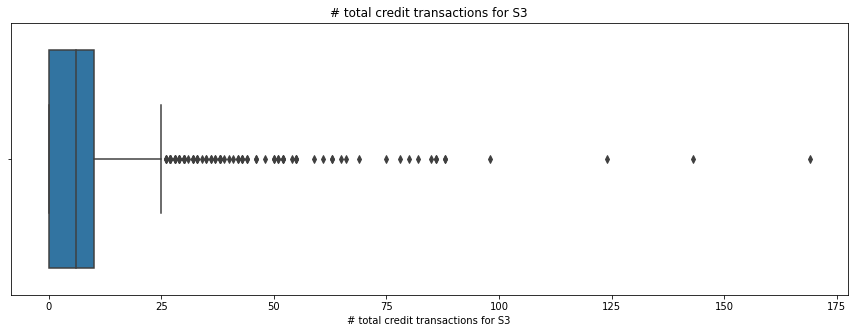

C:\Users\HiFi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


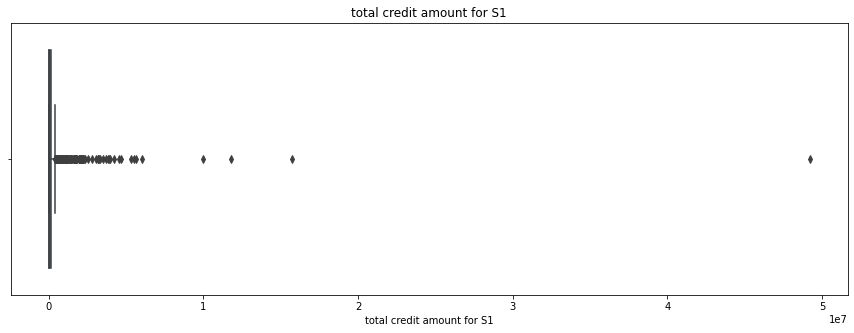

C:\Users\HiFi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


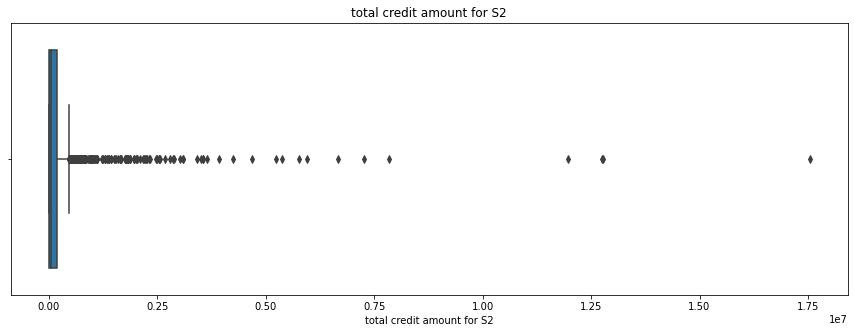

C:\Users\HiFi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


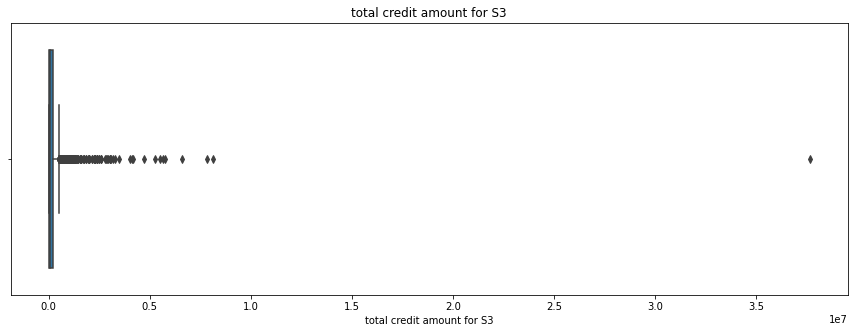

C:\Users\HiFi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


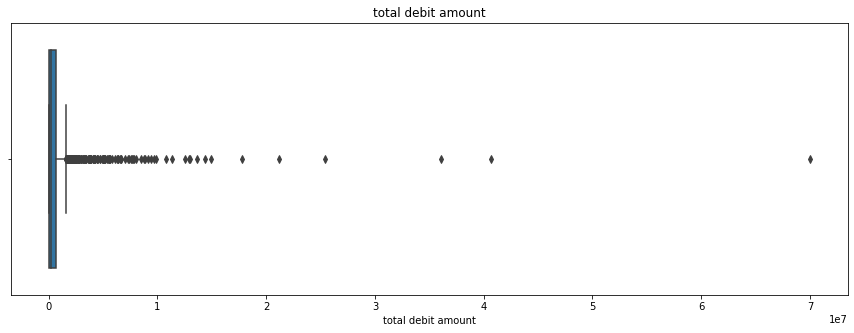

C:\Users\HiFi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


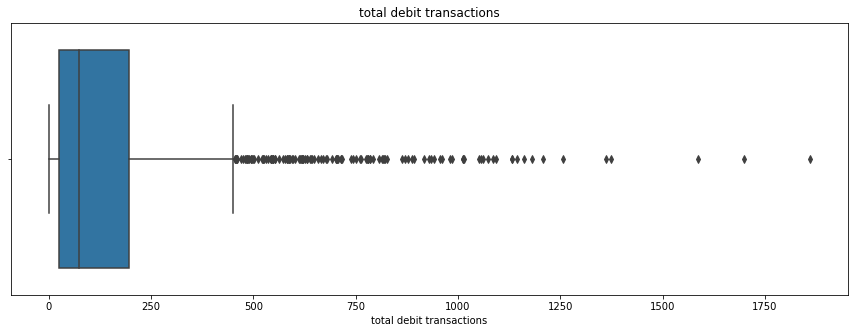

C:\Users\HiFi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


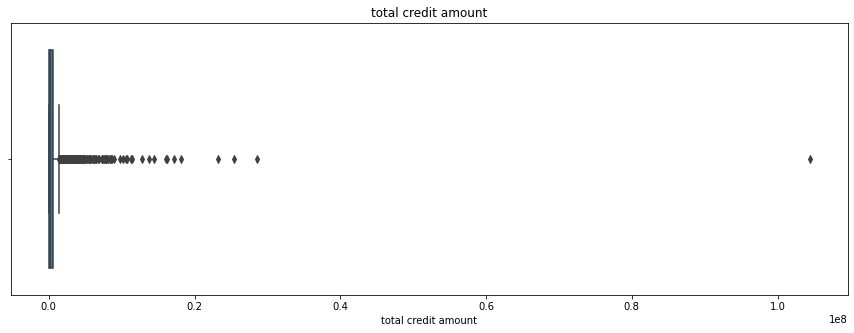

C:\Users\HiFi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


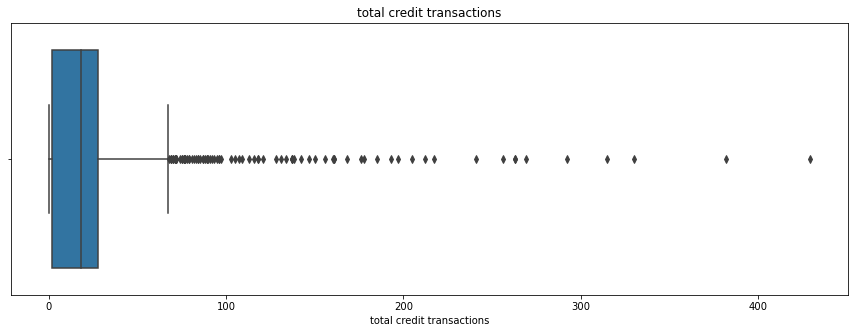

C:\Users\HiFi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


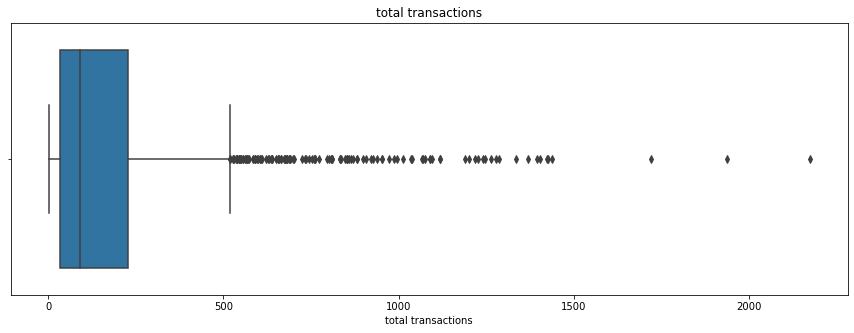

C:\Users\HiFi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


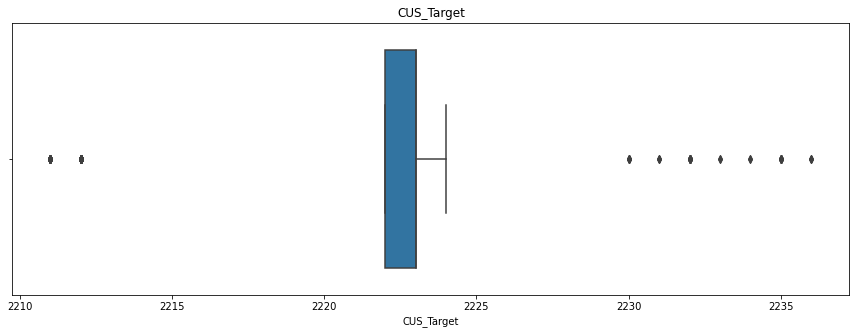

In [39]:
for col in data._get_numeric_data():
    plt.figure(figsize=(15,5))
    sns.boxplot(data[col])
    plt.title(col)
    plt.show()
    

In [40]:
data.drop(["# total debit transactions for S1","# total debit transactions for S2","# total debit transactions for S3","total debit amount for S1","total debit amount for S2","total debit amount for S3","total credit amount for S1","total credit amount for S2","total credit amount for S3","# total credit transactions for S1","# total credit transactions for S2","# total credit transactions for S3","total transactions"],axis=1,inplace=True)


In [41]:
data.head(5)

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,total debit amount,total debit transactions,total credit amount,total credit transactions,CUS_Target,TAR_Desc,Status
0,49,7116.64,MALE,MARRIED,25,4758311.63,887,5659653.33,65,2231,EXECUTIVE,ACTIVE
1,46,1500000.00,FEMALE,SINGLE,14,139363.22,97,87000.00,10,2223,LOW,ACTIVE
2,53,5000000.00,FEMALE,SINGLE,14,37375.46,53,1020883.70,27,2222,MIDLE,ACTIVE
3,15,500.00,FEMALE,SINGLE,14,4000.00,1,76946.96,12,2223,LOW,ACTIVE
4,48,9000000.00,FEMALE,SINGLE,5,338470.29,60,442100.00,21,2223,LOW,ACTIVE


In [42]:
data['CUS_Gender']=data['CUS_Gender'].replace({'MALE':1,'FEMALE':0})

In [43]:
data['Status']=data['Status'].replace({'ACTIVE':0,'CHURN':1})

In [44]:
data['CUS_Marital_Status']=data['CUS_Marital_Status'].replace({'MARRIED':2,'SINGLE':1,'WIDOWED':5,'DIVORCE':4,'OTHER':6,'PARTNER':3})

In [45]:
data['TAR_Desc']=data['TAR_Desc'].replace({'LOW':1,'MIDLE':2,'EXECUTIVE':3,'PLATINUM':4})

In [46]:
data.head(10)

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,total debit amount,total debit transactions,total credit amount,total credit transactions,CUS_Target,TAR_Desc,Status
0,49,7116.64,1,2,25,4758311.63,887,5659653.33,65,2231,3,0
1,46,1500000.00,0,1,14,139363.22,97,87000.00,10,2223,1,0
2,53,5000000.00,0,1,14,37375.46,53,1020883.70,27,2222,2,0
3,15,500.00,0,1,14,4000.00,1,76946.96,12,2223,1,0
4,48,9000000.00,0,1,5,338470.29,60,442100.00,21,2223,1,0
5,37,2556.00,1,1,14,1883962.89,490,2037638.47,95,2235,2,0
6,16,200000.00,0,1,14,8693.60,3,0.00,0,2223,1,1
7,39,10000000.00,1,2,14,1477803.14,422,1554678.53,32,2223,1,0
8,46,15000000.00,1,2,14,3240369.08,877,3160483.36,49,2212,3,0
9,59,1500000.00,0,2,14,535684.68,130,528046.93,12,2223,1,0


In [ ]:
sns.pairplot(hue='Status',data=data)

In [48]:
data['Status'].value_counts()

0    1022
1     227
Name: Status, dtype: int64

In [49]:
from sklearn.utils import resample
df_0= data[data["Status"]==0]
df_1=data[data["Status"]==1]
df_1_upsampled=resample(df_1,replace=True,n_samples=1022,random_state=20)
data1=pd.concat([df_0,df_1_upsampled])
print(f"Original:\n{data.Status.value_counts()}")

print(f"After Sampled:\n{data1.Status.value_counts()}")


Original:
0    1022
1     227
Name: Status, dtype: int64
After Sampled:
0    1022
1    1022
Name: Status, dtype: int64


In [50]:
data1.shape


(2044, 12)

In [51]:
data1['Status'].value_counts()

0    1022
1    1022
Name: Status, dtype: int64

In [52]:
data1

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,total debit amount,total debit transactions,total credit amount,total credit transactions,CUS_Target,TAR_Desc,Status
0,49,7116.64,1,2,25,4758311.63,887,5659653.33,65,2231,3,0
1,46,1500000.00,0,1,14,139363.22,97,87000.00,10,2223,1,0
2,53,5000000.00,0,1,14,37375.46,53,1020883.70,27,2222,2,0
3,15,500.00,0,1,14,4000.00,1,76946.96,12,2223,1,0
4,48,9000000.00,0,1,5,338470.29,60,442100.00,21,2223,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
906,41,1600.00,0,2,14,758456.39,141,402000.00,2,2222,2,1
475,18,1000000.00,0,1,3,6536.46,3,0.00,0,2223,1,1
928,32,100000.00,1,1,14,6000.00,1,0.00,0,2223,1,1
472,57,15000000.00,1,2,14,27070.23,17,2899.76,2,2222,2,1


In [53]:
X=data1.iloc[:,:11]
y=data1.iloc[:,11:]
print(X)
print(y)

      AGE  CUS_Month_Income  CUS_Gender  CUS_Marital_Status  YEARS_WITH_US  \
0      49           7116.64           1                   2             25   
1      46        1500000.00           0                   1             14   
2      53        5000000.00           0                   1             14   
3      15            500.00           0                   1             14   
4      48        9000000.00           0                   1              5   
...   ...               ...         ...                 ...            ...   
906    41           1600.00           0                   2             14   
475    18        1000000.00           0                   1              3   
928    32         100000.00           1                   1             14   
472    57       15000000.00           1                   2             14   
1073   43           4383.00           0                   1             14   

      total debit amount  total debit transactions  total credi

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

In [56]:
X_train.head(3)

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,total debit amount,total debit transactions,total credit amount,total credit transactions,CUS_Target,TAR_Desc
412,54,400.0,1,1,14,684633.23,224,2054633.03,50,2235,2
183,61,5000000.0,1,1,14,47842.25,71,0.00,0,2223,1
723,63,2000000.0,0,2,14,2134377.78,52,417637.33,21,2222,2


In [57]:
y_train.head(3)

,Status
412,0
183,0
723,0


In [58]:
from sklearn.ensemble import RandomForestClassifier
classifer=RandomForestClassifier()
classifer.fit(X_train,y_train)


C:\Users\HiFi\AppData\Local\Temp/ipykernel_12532/3327650738.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifer.fit(X_train,y_train)


RandomForestClassifier()

In [59]:
y_predict=classifer.predict(X_test)
y_predict

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,

In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("confusion_matrix :\n ",confusion_matrix(y_test,y_predict),"\n")
print("accuracy_score : \n",accuracy_score(y_test,y_predict),"\n")
print("classification_report :  \n",classification_report(y_test,y_predict))

confusion_matrix :
  [[169  28]
 [  4 208]] 

accuracy_score : 
 0.921760391198044 

classification_report :  
               precision    recall  f1-score   support

           0       0.98      0.86      0.91       197
           1       0.88      0.98      0.93       212

    accuracy                           0.92       409
   macro avg       0.93      0.92      0.92       409
weighted avg       0.93      0.92      0.92       409



In [61]:
import pickle
pickle_out=open("classifer.pkl",'wb')
pickle.dump(classifer,pickle_out)
pickle_out.close()

# Analysis

The Target variable highley imblanced

Age feature is positivly skiwed

When considered age feature, mostly of the churn customers fall under the age range of 40-60

customer who are married or single tend to churn

Executive class has less prople yet have high rate of churn

Customers Avg years spend with the bank is 14 years

# Model

Random Forecast is the Best Accuracy - 92 Percent.